In [1]:
import numpy as np 
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('witcher_network.csv')

In [3]:
df = df[df["book"] == 1]

In [4]:
witcher_graph = nx.from_pandas_edgelist(df, "Source", "Target", edge_attr="Weight")

In [5]:
# to set the width of edges
weights = np.array([e[2]["Weight"] for e in witcher_graph.edges(data=True)])
max_weight = np.max(weights)

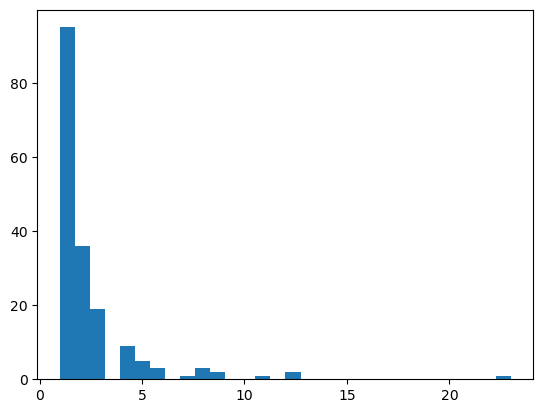

In [6]:
plt.hist(weights, bins=30) # the plot to help to see the width of edges
plt.show()

In [7]:
# the size of nodes (depends on characters overall interactions)
node_degree = dict(witcher_graph.degree(weight = "Weight"))
node_size = np.array([node_degree[n] for n in witcher_graph.nodes()])

In [8]:
pos = nx.kamada_kawai_layout(witcher_graph)

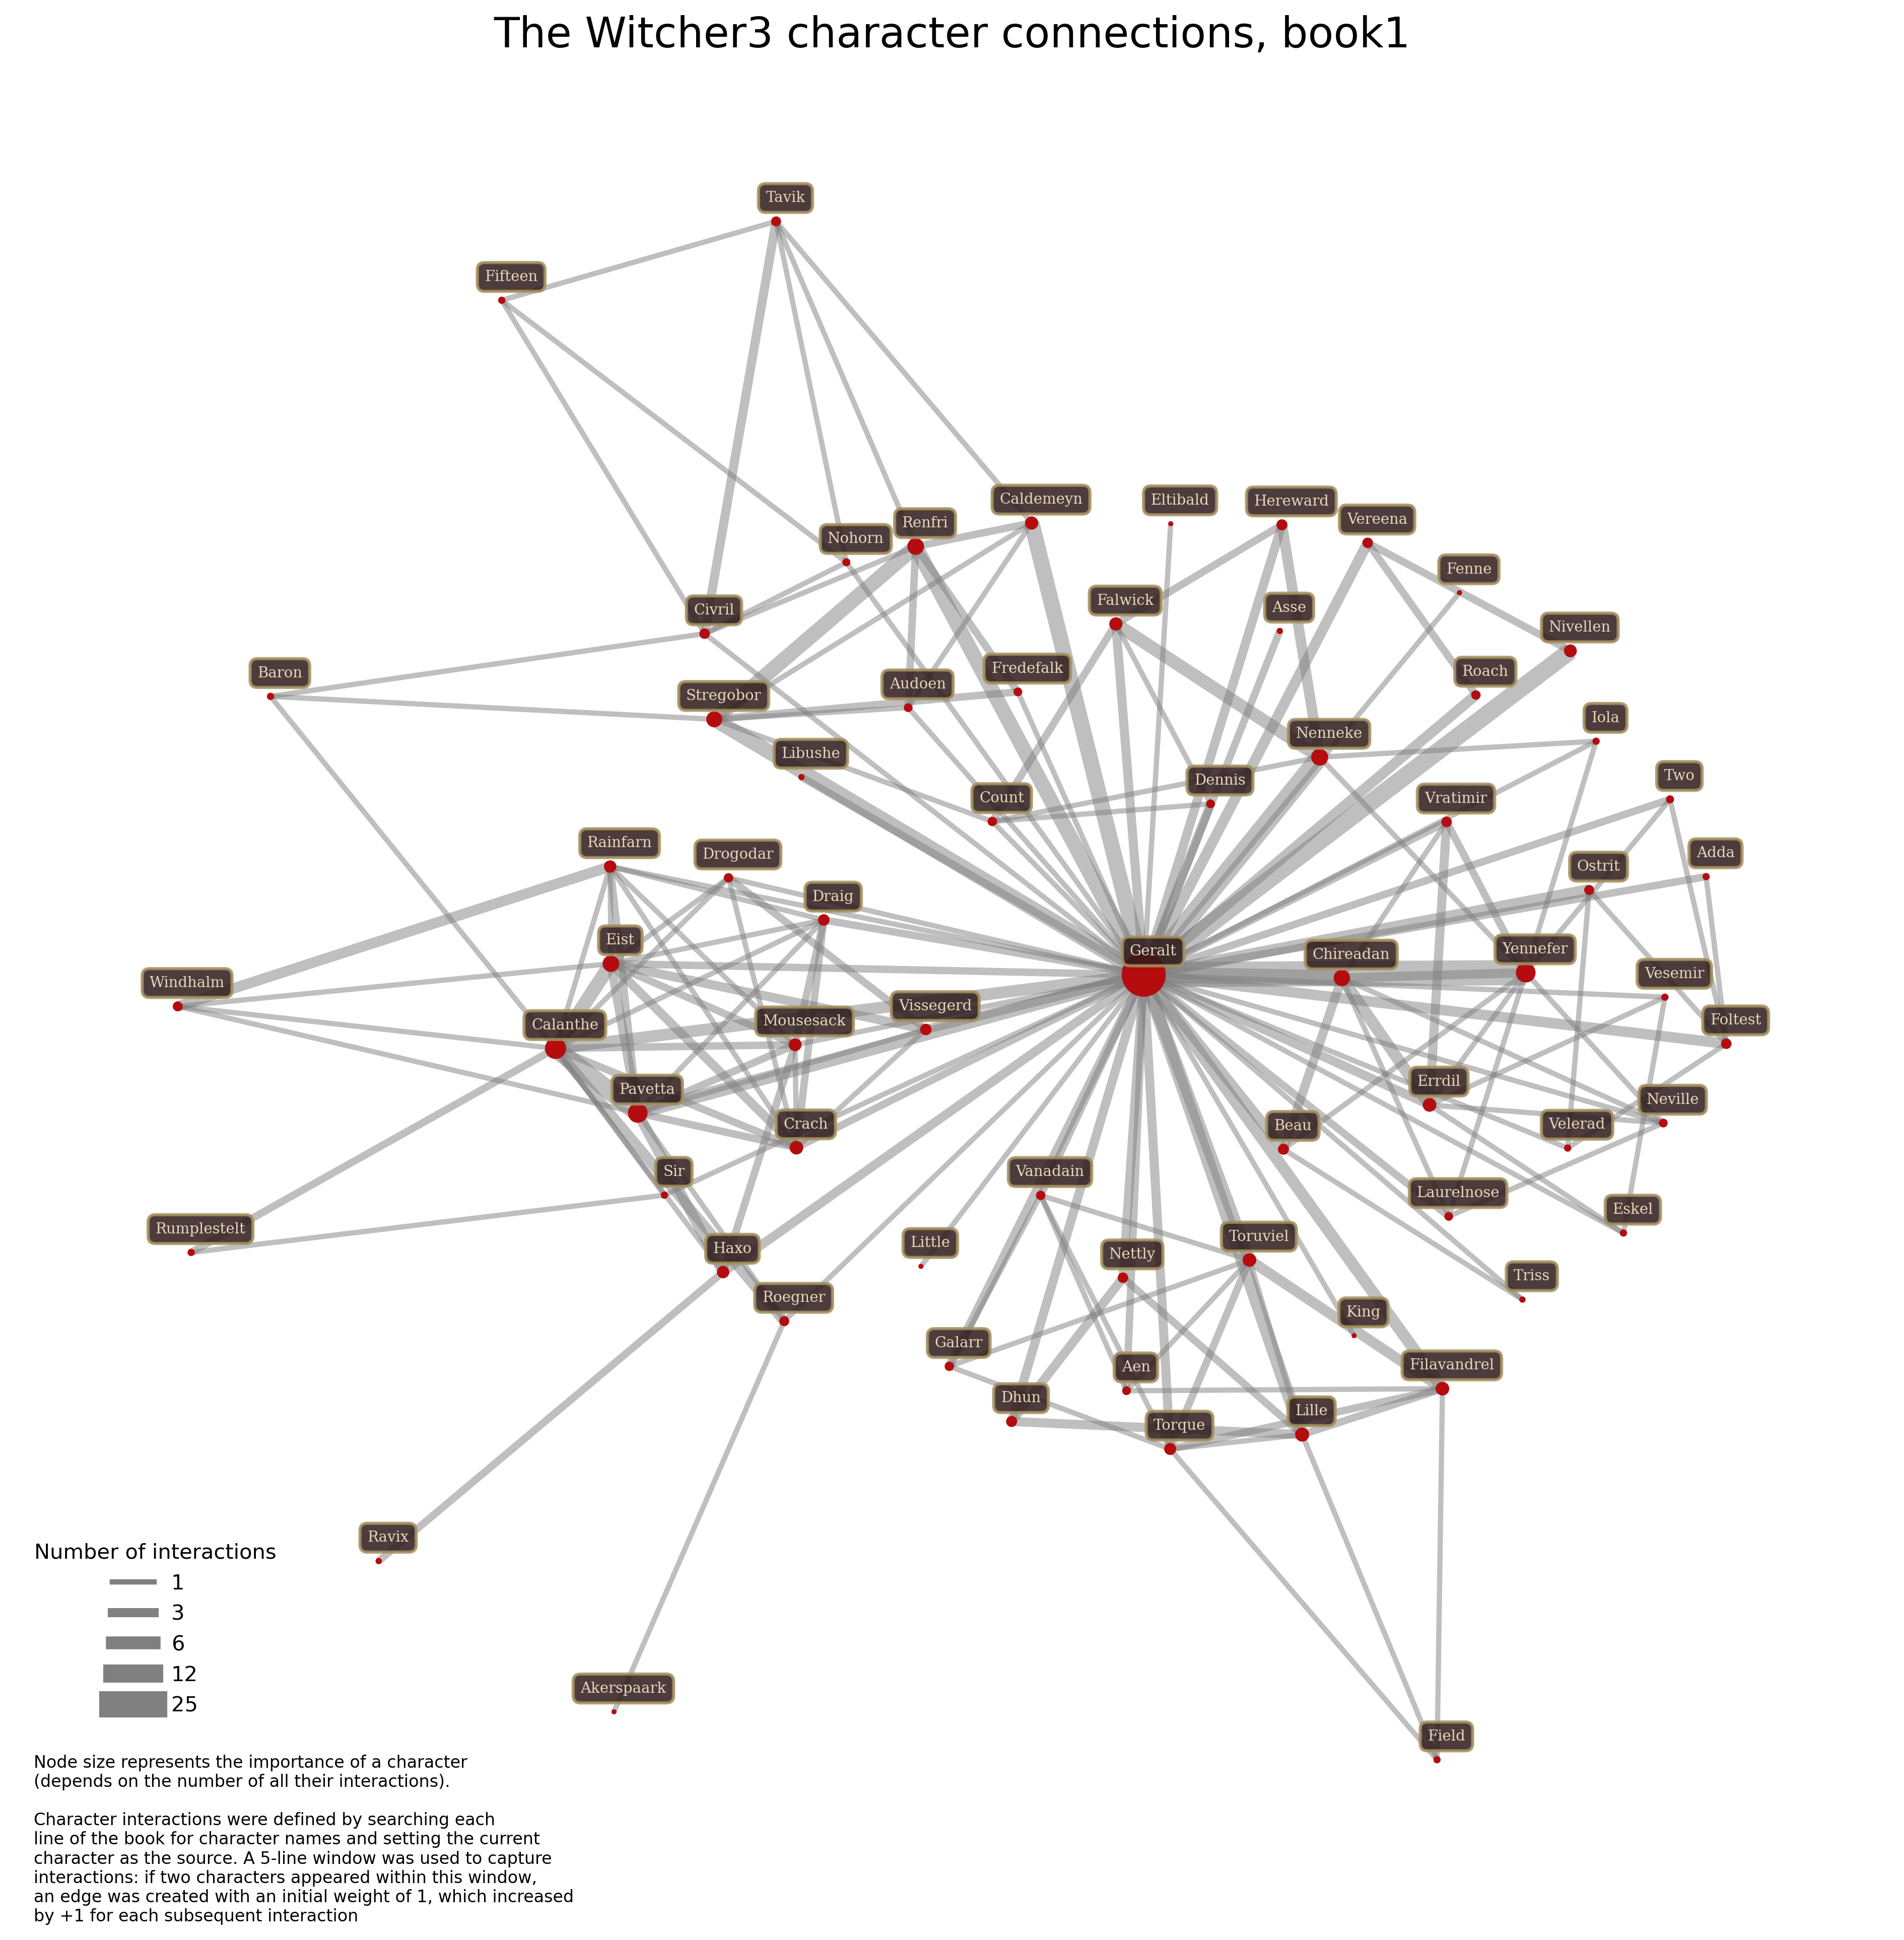

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16), dpi = 300)

ax.set_title("The Witcher3 character connections, book1", fontsize=20)

nx.draw_networkx_nodes(witcher_graph, 
    pos=pos, 
    node_color="#b50c0f", 
    node_size=node_size * 2, 
    ax=ax
)

nx.draw_networkx_edges(
    witcher_graph,
    pos=pos,
    width=np.sqrt(weights / max_weight) * 12,
    edge_color="gray",
    alpha=0.5,
    ax=ax,
)

node_labels = {node: node for node in witcher_graph}
label_pos = {k: (v[0] + 0.01, v[1] + 0.03) for k, v in pos.items()}
             
nx.draw_networkx_labels(
    witcher_graph,
    pos=label_pos,
    labels=node_labels,
    font_color="#E8D7BD",  
    font_family="serif",
    font_size=7,
    bbox=dict(
        facecolor="#2E1A1A",  
        edgecolor="#A69260",  
        boxstyle="round,pad=0.5",
        alpha=0.85,          
        linewidth=1.5
    ),
    ax=ax,
)

for w in [1, 3, 6, 12, 25]:
    ax.plot([], [], "gray", linewidth=np.sqrt(w) / np.sqrt(max_weight) * 12, label=w)
ax.legend(title="Number of interactions", frameon=False, bbox_to_anchor=(0, 0.1), loc = "lower left")
ax.text(0.01, 0.1, 
"""
Node size represents the importance of a character
(depends on the number of all their interactions).

Character interactions were defined by searching each
line of the book for character names and setting the current
character as the source. A 5-line window was used to capture
interactions: if two characters appeared within this window,
an edge was created with an initial weight of 1, which increased
by +1 for each subsequent interaction""", 
    fontsize=8, 
    transform=ax.transAxes,
    verticalalignment="top")
plt.axis("off")
#plt.savefig('Wither3Network.jpg', format='jpg')
plt.show()